## Summary

The dataset contains both verified and unverified reviews. To ensure the accuracy and reliability of the analysis, the project will focus exclusively on verfied reviews. However, before discarding the unverified reviews, a comparative analysis was conducted to determine if there are significant differences between verified and unverified reviews concerning the dataset's target variables. Additionally, the percentage of unverified reviews across all airlines was analyzed to ensure that their exclusion would not disproportionately impact specific airlines.

Descriptive statistics,a bar chart, and a contingency table with percentages of recommendations suggest that unverified reviews tend to be more positive than verified reviews. This observation is confirmed through a Mann-Whitney U test for the 'Overall Rating' feature and a Chi-Square test of Independence for the 'Recommended' feature. The results of both tests suggest that the differences are statistically significant.This analysis indicates that including unverified reviews in the project could positively bias the results, supporting the decision to exclude them.

The percentage of unverified reviews ranges from 19% to 29% across different airlines. This relatively narrow range suggests that unverified reviews are fairly evenly distributed, making the exclusion of unverified reviews is considered acceptable for the analysis.

## Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import scipy.stats as stats # Perform statistical test

## Data

The cleaned dataset with engineered features is stored in the 'data/interim' directory within this repository. The path has been included to run the code without further modifications.

In [2]:
df= pd.read_csv('../data/interim/feature_airlines.csv', index_col = 0)

In [3]:
df.head()

,Title,Reviews,Frequent Reviewer,Verified,Airline,Class,Type of Traveller,Route,Review Date,Flight Year,Flight Month,Quick Review,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Flight was amazing. The crew onboard this fl...,0,1,Singapore Airlines,Business Class,Solo Leisure,Jakarta to Singapore,2024-03-01,2023,12,False,4,4,4,4,4,9,1
1,seats on this aircraft are dreadful,Booking an emergency exit seat still meant h...,1,1,Singapore Airlines,Economy Class,Solo Leisure,Phuket to Singapore,2024-02-21,2024,2,True,5,3,4,4,1,3,0
2,Food was plentiful and tasty,Excellent performance on all fronts. I would...,2,1,Singapore Airlines,Economy Class,Family Leisure,Siem Reap to Singapore,2024-02-20,2024,2,True,1,5,2,1,5,10,1
3,“how much food was available,Pretty comfortable flight considering I was f...,0,1,Singapore Airlines,Economy Class,Solo Leisure,Singapore to London Heathrow,2024-02-19,2024,2,True,5,5,5,5,5,10,1
4,“service was consistently good”,The service was consistently good from start ...,0,1,Singapore Airlines,Economy Class,Family Leisure,Singapore to Phnom Penh,2024-02-19,2024,2,True,5,5,5,5,5,10,1


## Overall Rating Analysis

### Initial Overview

#### Descriptive statistics:

Unverified reviews show a better average overall rating (0.25 difference) with a smaller standard deviation (0.057 difference).
A statistical test will be performed to determine if both groups are statistically different.

In [4]:
# Summary statistics for verified vs non-verified reviews
summary_stats = df.groupby('Verified')['Overall Rating'].describe()
print(summary_stats)

           count      mean       std  min  25%  50%  75%   max
Verified                                                      
0         1883.0  5.827934  3.478051  1.0  2.0  7.0  9.0  10.0
1         6217.0  5.573267  3.535508  1.0  2.0  6.0  9.0  10.0


#### Bar chart:

A bar chart displaying the amount of verified and unverified reviews shows that both follow a similar distribution. The biggest difference resides in the smaller proportion of verified reviews with a score of 10, contributing to the worse Overall Rating mean. 

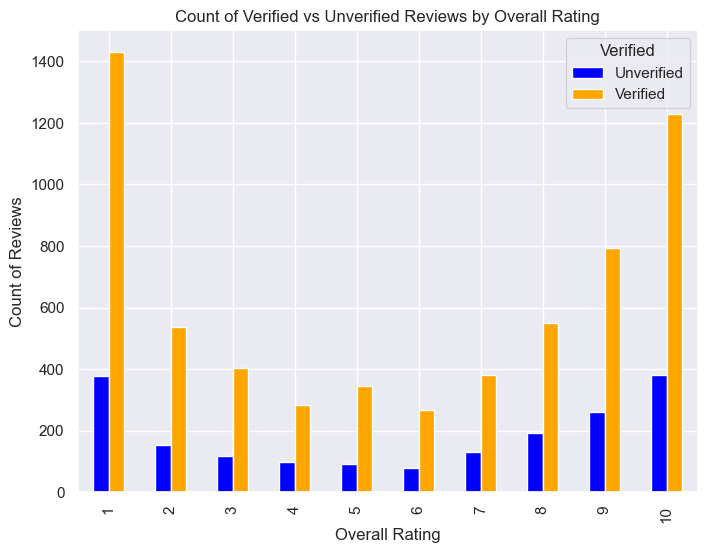

In [20]:
# Creating the pivot table
pivot_table = df.pivot_table(index='Overall Rating', columns='Verified', aggfunc='size')

# Creating the chart
ax = pivot_table.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(8,6))

# Customizing the chart
ax.set_title('Count of Verified vs Unverified Reviews by Overall Rating')
ax.set_xlabel('Overall Rating')
ax.set_ylabel('Count of Reviews')
plt.legend(title='Verified', labels=['Unverified', 'Verified'])

# Plotting the chart
plt.show()

### Statistical Test

In order to select which test is more appropiated, some assumptions need to be checked:

#### Normality Assumption:
The previous bar chart suggests that the data does not follow a normal distribution. A Shapiro-Wilk test is performed to verify it.

In [23]:
# Split the data into verified and unverified reviews
for i, verified in enumerate(df['Verified'].unique()):
    # Shapiro-Wilk Test
    shapiro_test = stats.shapiro(df[df['Verified']==verified]['Overall Rating'])
    if verified==0:
        print(f"Shapiro-Wilk Test for Unverified Reviews: Statistic={shapiro_test[0]:.5f}, p-value={shapiro_test[1]:.5f}")
    else:
        print(f"Shapiro-Wilk Test for Verified Reviews: Statistic={shapiro_test[0]:.5f}, p-value={shapiro_test[1]:.5f}")

Shapiro-Wilk Test for Verified Reviews: Statistic=0.84885, p-value=0.00000
Shapiro-Wilk Test for Unverified Reviews: Statistic=0.85293, p-value=0.00000


C:\Users\danub\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


To verify the accuracy of the previous test for big sample sizes, Q-Q plots are displayed to ensure the non normality of the distributions:

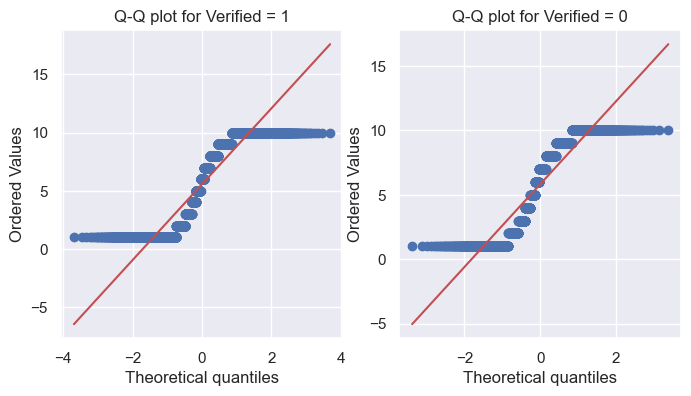

In [24]:
# Creating subplots to display both plots together
fig, axes = plt.subplots(1,2,figsize=(8,4))

# Split the data into verified and unverified reviews
for i, verified in enumerate(df['Verified'].unique()):
    # Creating Q-Q plots
    stats.probplot(df[df['Verified']==verified]['Overall Rating'],dist='norm',plot=axes[i])
    axes[i].set_title(f'Q-Q plot for Verified = {verified}')

plt.show()

#### Mann-Whitney U test:
Due to the non-normal distributions of the two independent groups, the non-parametric Mann-Whitney U test was performed. The null hypothesis is that the distributions of overall ratings for verified and unverified reviews are equal. The alternative hypothesis is that the distribution of overall ratings for unverified reviews is stochastically greater than that for verified reviews..

In [29]:
# Splitting the data into verified and unverified reviews
verified_ratings = df[df['Verified'] == 1]['Overall Rating']
unverified_ratings = df[df['Verified'] == 0]['Overall Rating']

# Performing the Mann-Whitney U Test
stat, p_value = stats.mannwhitneyu(unverified_ratings, verified_ratings, alternative='greater')

# Displaying the results
print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p_value}')

Mann-Whitney U test statistic: 6079434.5
P-value: 0.005026581927660268


#### Results:
The p-value shows that the null hypothesis can be rejected at a significance level of 0.5%. This result suggests that the distribution of overall ratings for unverified reviews is statistically significantly greater than the one for verified reviews.

## Recommended Analysis

### Percentage of recommendations
After observing that unverified reviews could bias the analysis towards the positive side in terms of 'Overall Rating', it is interesting to investigate whether the same trend happens with 'Recommended' feature. A contingency table for 'Verified' and 'Recommended' variables is created, adding a third column showing the percentage of recommended reviews.

In [45]:
# Creating the contingency table
contingency_table = pd.crosstab(df['Verified'], df['Recommended'])

# Calculating and adding the percentages of recommended reviews
contingency_table['Percentage'] = (contingency_table[1] / (contingency_table[0]+contingency_table[1] )) * 100
contingency_table

Recommended,0,1,Percentage
Verified,,,
0,837,1046,55.549655
1,2976,3241,52.131253


### Statistical test
The percentages displayed in the contingency table suggest that,once again, unverified reviews tend to be more positive than verified reviews.
To test this observation statistically, a Chi-Square test of independence is performed. This test compares if the proportion of recommended reviews is the same for both verified and unverified reviews.

In [49]:
# Perform the Chi-Square test using only the first two columns of the contingency table (excluding 'Percentage')
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:, :-1])

# Displaying the results
print(f'Chi-Square test statistic: {chi2_stat}')
print(f'P-value: {p_value}')

Chi-Square test statistic: 6.642121535456443
P-value: 0.009959526096220596


#### Results:
The p-value of the Chi-Square test of independence is approximately 0.01. This result suggests that, at a 1% significance level, the proportions of recommended reviews across verified and unverified reviews are statistically significantly different. These findings are consistent with the results obtained from the analysis of Overall Rating, indicating that unverified reviews may indeed bias the analysis towards a more positive outcome.

## Unverified reviews per Airline

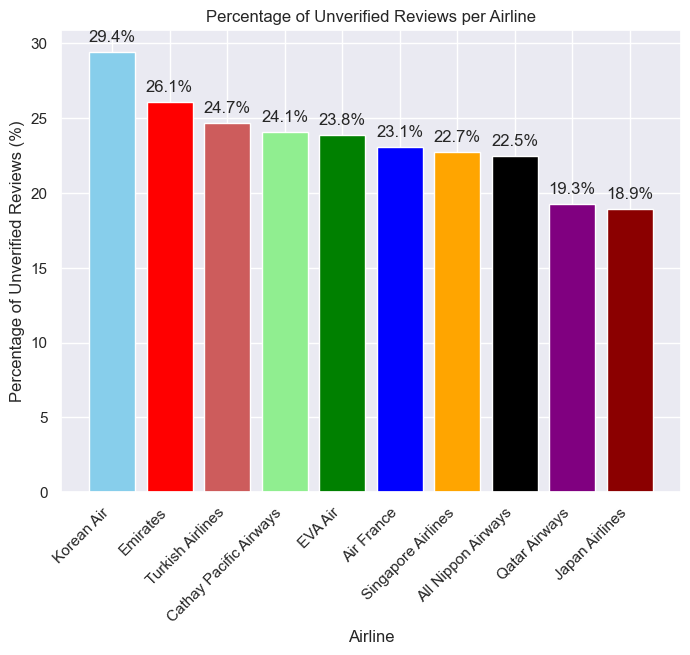

In [54]:
# Filtering only unverified reviews
unverified_counts = df[df['Verified'] == 0].groupby('Airline').size()

# Total reviews per airline
total_counts = df.groupby('Airline').size()

# Percentage of unverified reviews
percentage_unverified = (unverified_counts / total_counts) * 100

# Sorting airlines by percentage of unverified reviews (from highest to lowest)
percentage_unverified = percentage_unverified.sort_values(ascending=False)

# Defining a color map for the airlines
airline_color_map = {
    'Emirates': 'red',
    'Qatar Airways': 'purple',
    'All Nippon Airways':'black',
    'EVA Air' :'green',
    'Japan Airlines':'darkred',
    'Singapore Airlines':'orange',
    'Cathay Pacific Airways':'lightgreen',
    'Air France':'blue',
    'Turkish Airlines':'indianred',
    'Korean Air':'skyblue'
}

# Ordering airlines based on the sorted percentage
ordered_airlines = [airline for airline in percentage_unverified.index if airline in airline_color_map.keys()]

# Creating the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(ordered_airlines, percentage_unverified[ordered_airlines], 
               color=[airline_color_map[airline] for airline in ordered_airlines])

# Adding percentage values on top of the bars
for bar, percentage in zip(bars, percentage_unverified[ordered_airlines]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{percentage:.1f}%', ha='center', va='bottom')

# Customizing the chart
plt.title('Percentage of Unverified Reviews per Airline')
plt.xlabel('Airline')
plt.ylabel('Percentage of Unverified Reviews (%)')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()